# Implementation of an Adaline with Stochastic Gradient Descent in Python

In [1]:
import numpy as np

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier
    
    Parameters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    
    n_iter: int
        Number of iterations over the training dataset (the epoch)
        
    shuffle: bool (default: True)
        Shuffles training data every epoch if True to prevent cycles
    
    random_state: int
        Random number generator seed for random weight initialization
    
    
    Attributes
    ------------
    w_: 1d-array
        Weights after fitting
        
    cost_: list
        Sum-of-squares cost function value averaged over all training examples in each epoch
    
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False       
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of
            examples and n_features is the number of features.
            
        y : array-like, shape = [n_examples]
            Target values
            
        Returns
        ----------
        self: object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data WITHOUT reinitializing the weights"""
        
        #Initialize the weights in case they haven't been
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        
        #The user submits MORE than ONE training example
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        
        #The user submitted only ONE training example
        else:
            self._update_weights(X, y)
        
        return self
            
            
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        rand_indices = self.rgen.permutation(len(y)) #Form an array of random indices btw 0 and len(y)
        return X[rand_indices], y[rand_indices] #return a re-arranged data set
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                  size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input (i.e. linear combination)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation (identity function)"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                        >=0.0, 1, -1)

# Training the Adaline

We'll do exactly like previous time

## Loading the Iris dataset into a Panda dataframe

In [2]:
import os
import pandas as pd

#Load the dataset into a Panda dataframe
df = pd.read_csv('./iris.data', header=None, encoding='utf-8')

#print the last five lines to make sure the data is there
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


## Forming the training set to feed to the Adaline

In [3]:
#Select Setosa and Versicol labels (4th column) and turn them to 1 or -1
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#Create the training set
X = df.iloc[0:100, [0, 2]].values

## Let's standardize the features of our training set

Remember standardizing consists in bringing all of our features on the same scale.

In [4]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std() #Standardize column 0
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std() #Standardize column 1

# Let's feed the training set into an Adaline

Remember, this Adaline implements Stochastic Gradient Descent

In [5]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

We just trained our Adaline. Now, let's plot the Average cost (i.e. error) against the epochs to see how our Adaline learned over time.

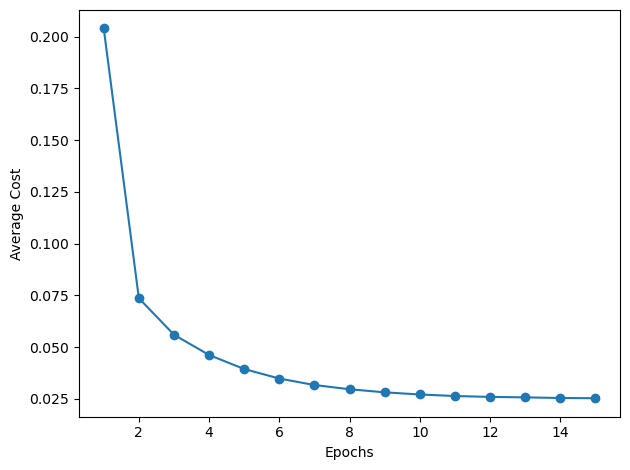

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

Beautiful!
Look at how the Adaline converges over time. Over time, the average error gets smaller. It is great because it indicates a tighter and tighter fit between our prediction and the truth :)